In [1]:
from itertools import combinations_with_replacement

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 12})

In [2]:
# ローレンツ方程式
def dX_dt(X, t, a, b, c):
    return np.array(
        [a * (X[1] - X[0]), X[0] * (b - X[2]) - X[1], X[0] * X[1] - c * X[2]]
    )

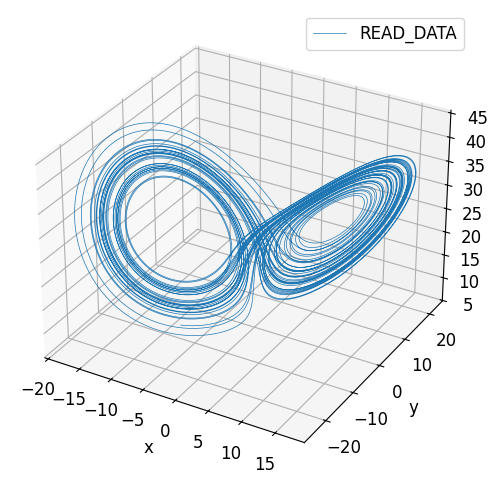

In [3]:
# plotting observed data.
df = pd.read_csv("lorenze_attractor.csv")
X = np.array([df["X"], df["Y"], df["Z"]])

ax = plt.figure(figsize=(6,6)).add_subplot(projection="3d")
ax.plot(X[0],X[1],X[2], label="READ_DATA",lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

In [4]:
#PyMC v5.12.0　(注意：v5.13.0 -- 5.17.0では、ABCは動かない(Colab上での確認）)
!pip install watermark
!pip install pymc==5.12.0
import numpy as np #numpy
from scipy.integrate import odeint #odeint
import matplotlib.pyplot as plt #to draw graphs
import pandas as pd

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

# ローレンツ方程式
def dX_dt(X, t, a, b, c):
    return np.array([a * (X[1] - X[0]), X[0] * (b - X[2]) - X[1], X[0] * X[1] - c * X[2]])

# plotting observed data.
df = pd.read_csv("lorenze_attractor.csv")
X = np.array([df["X"], df["Y"], df["Z"]])

observed = X.T

X0 = np.array([0.0,1.0,20.0])
t = np.linspace(0, 50, len(observed))
print(t)

def competition_model(rng, a, b, c, size=None):
    return odeint(dX_dt, y0=observed[1], t=t[1:], rtol=0.0001, args=(a, b, c))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.7/473.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.26.4
    Uninstalling pytensor-2.26.4:
      Successfully uninstalled pytensor-2.26.4
  Attempting uninstall: pymc
    Found existing installation: pymc 5.19.1
    Uninstalling pymc-5.19.1:
      Successfully uninstalled pymc-5.19.1
[0.0000000e+00 2.5000125e-04 5.0000250e-04 ... 4.9999500e+01 4.9999750e+01
 5.0000000e+01]


In [5]:
dt = 50 / len(observed)
NUM_T = len(observed)
DIM = 3
dX = np.zeros_like(observed)
coeff = np.zeros_like(observed)

for t in range(NUM_T-1):
  for i in range(DIM):
    dX[t, i] = observed[t+1, i] - observed[t, i]
  coeff[t, 0] = dX[t, 0] / dt / (observed[t ,1] - observed[t, 0])
  coeff[t, 1] = (dX[t, 1] / dt + observed[t, 1]) / observed[t, 0] + observed[t, 2]
  coeff[t, 2] = (observed[t, 0] * observed[t, 1] - dX[t, 2] / dt) / observed[t ,2]

print(np.average(coeff[1:-1,0]), np.average(coeff[1:-1,1]), np.average(coeff[1:-1,2]))

<ipython-input-5-026b4a31c73d>:11: RuntimeWarning: divide by zero encountered in scalar divide
  coeff[t, 1] = (dX[t, 1] / dt + observed[t, 1]) / observed[t, 0] + observed[t, 2]


10.005423599984438 28.006948512910324 2.6652205597603844


In [6]:
X0 = [0.0,1.0,20.0]
t = np.linspace(0, 50, len(observed))
A, B, C = np.average(coeff[1:-1,0]), np.average(coeff[1:-1,1]), np.average(coeff[1:-1,2])
sol = odeint(dX_dt, y0=X0, t=t, rtol=1e-2, args=(A,B,C))
print(sol)

[[ 0.00000000e+00  1.00000000e+00  2.00000000e+01]
 [ 2.49793780e-03  9.99752534e-01  1.99866786e+01]
 [ 4.98902178e-03  9.99510139e-01  1.99733667e+01]
 ...
 [-3.10279929e-01 -5.76789607e-01  1.09066099e+01]
 [-3.10949184e-01 -5.77976836e-01  1.08993889e+01]
 [-3.11619881e-01 -5.79167424e-01  1.08921728e+01]]


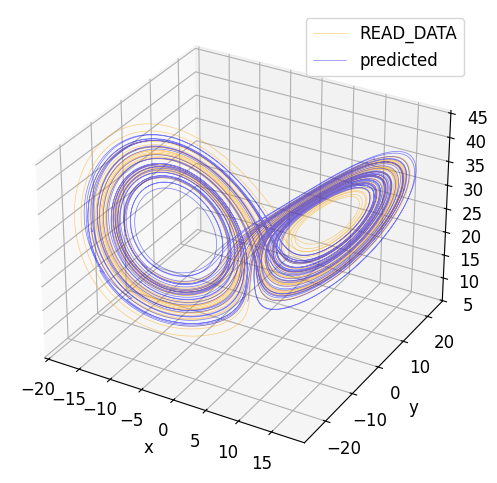

In [7]:
# plot results
ax = plt.figure(figsize=(14,6)).add_subplot(projection="3d")
ax.plot(*X, label="READ_DATA", c="orange",alpha=0.5,lw=0.5)
ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], c="blue",lw=0.5, label="predicted", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.savefig("Lorenz.pdf")

In [8]:
diff = 0
for t in range(NUM_T):
  for i in range(3):
    diff += abs(sol[t,i] - X[i,t])**2 / len(X)
print(np.sqrt(diff))

5413.8474028293085


5088.060378616432
4705.408854910766
5223.083857995854
4938.487261195644
4564.5358479827155
5201.695375282996


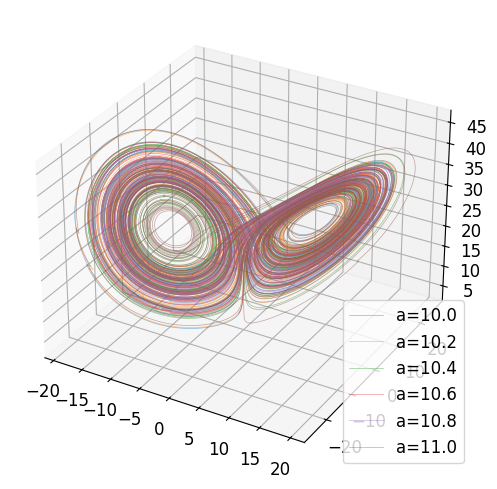

In [17]:
ax.clear()
ax = plt.figure(figsize=(14,6)).add_subplot(projection="3d")
X0 = [0.0,1.0,20.0]
t = np.linspace(0, 50, len(observed))
for a in np.arange(10,11.2,0.2):
  t = np.linspace(0, 50, len(observed))
  sol = odeint(dX_dt, y0=X0, t=t, rtol=1e-2, args=(a,B,C))
  ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], lw=0.5, label=f"{a=:.1f}", alpha=0.5)
  # calculate difference
  diff = 0
  for t in range(NUM_T):
    for i in range(3):
      diff += abs(sol[t,i] - X[i,t])**2 / len(X)
  print(np.sqrt(diff))
ax.legend()
plt.savefig("Lorentz_compare.pdf")
plt.show()